In [1]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Read and prepare database
database_path = "../database/reportData/WIG_ODZIEZ_COMPANY_YY.csv"
index_report = pd.read_csv(database_path, index_col=[0])

# Get basic information 
print("Basics information (before remove NaN):")
print(f"  Number of samples: {index_report.shape[0]}")
print(f"  Number of feature: {index_report.shape[1] - 2}")

# Check NaN values in database 

# Remove samples where sum(NaN feature) > 20% all feature (in sample)
index_report = index_report.dropna(axis = 0, thresh = index_report.shape[1] * 0.8)
# Remove feature where 
index_report = index_report.dropna(axis = 1, thresh = index_report.shape[0] * 0.8)

# Get basic information 
print("Basics information (after remove NaN):")
print(f"  Number of samples: {index_report.shape[0]}")
print(f"  Number of feature: {index_report.shape[1] - 2}")

index_report

Basics information (before remove NaN):
  Number of samples: 615
  Number of feature: 27
Basics information (after remove NaN):
  Number of samples: 603
  Number of feature: 23


,D_DATE,Ticker,Cena / Wartość księgowa,Cena / Przychody ze sprzedaży,EV / Przychody ze sprzedaży,EV / EBIT,EV / EBITDA,ROE,ROA,Marża zysku operacyjnego,...,Udział zysku netto w przepływach operacyjnych,Zadłużenie ogólne,Zadłużenie kapitału własnego,Zastosowanie kapitału obcego,Wskaźnik ogólnej sytuacji finansowej,I stopień pokrycia,Płynność gotówkowa,Płynność szybka,Płynność bieżąca,Pokrycie zobowiązań należnościami
1,2006-05-15,CCC,18.87,19.45,24.48,33.22,31.66,-4.85,-8.63,-6.57,...,81.17,18.69,23.57,22.37,9.38,-10.62,-93.46,-34.48,-18.75,40.06
2,2006-08-14,CCC,20.34,2.62,2.49,-9.32,-8.50,36.89,25.47,13.04,...,-13.97,31.78,43.80,29.48,23.58,-4.56,66.99,-21.61,-22.53,-26.99
3,2007-03-01,CCC,-0.78,2.66,1.27,8.34,7.61,-10.30,-0.09,-6.52,...,34.45,-24.60,-32.33,-15.99,-25.11,-10.85,94.41,10.78,26.83,-2.81
4,2007-05-15,CCC,8.00,5.10,7.16,-0.58,-0.01,6.38,-9.96,7.75,...,-2.48,49.01,76.08,37.35,36.53,-0.61,-46.65,-24.57,-29.81,-17.71
5,2007-08-10,CCC,52.55,28.13,26.04,35.95,34.66,-0.55,-11.87,-7.25,...,-55.58,20.65,36.19,34.22,-2.89,-27.64,59.71,1.64,-27.32,-3.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2022-11-24,WTN,-21.07,-21.16,-19.48,-22.42,-19.93,-2.55,-2.15,3.80,...,5.94,-0.48,-0.88,-8.56,2.11,11.68,82.08,15.21,0.11,-6.09
611,2023-05-25,WTN,4.92,2.15,1.39,2.31,3.02,2.93,9.29,-0.88,...,-3.84,-11.38,-16.53,-9.37,-6.51,3.15,20.52,35.39,20.76,42.51
612,2023-09-14,WTN,53.49,14.99,12.05,20.25,18.92,30.50,-1.59,-6.82,...,-4.97,54.57,104.95,48.95,17.82,-20.89,-31.42,-40.51,-45.91,-44.21
613,2023-11-23,WTN,-34.39,-29.38,-20.76,-13.74,-15.02,-9.67,-0.54,-8.17,...,-4.96,-10.96,-19.13,-11.42,-1.76,10.91,-17.92,0.46,16.73,9.65


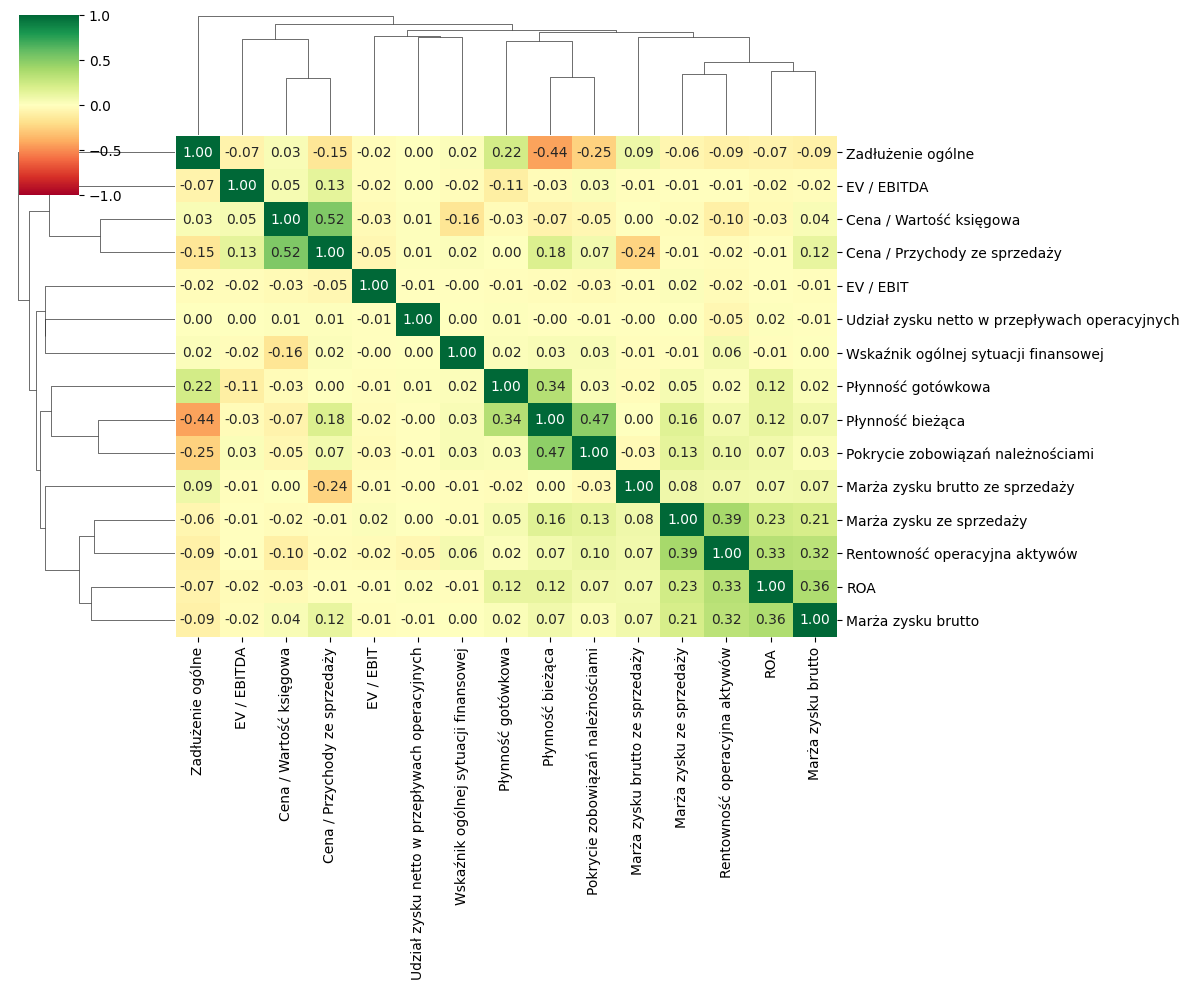

In [3]:
# Select not important features base on correlation > |0.6|
NOT_IMPORTANT_FEATURES = [
    "Zastosowanie kapitału obcego",
    "Zadłużenie kapitału własnego",
    "ROE",
    "Marża zysku netto",
    "Marża zysku operacyjnego",
    "EV / Przychody ze sprzedaży",
    "I stopień pokrycia",
    "Płynność szybka",
]
# Remove not important feature
index_report = index_report.drop(columns=NOT_IMPORTANT_FEATURES)

# Display correlation matrix
sns.clustermap(index_report.drop(columns=["D_DATE", "Ticker"]).corr(), 
               cmap='RdYlGn', vmin=-1, vmax=1, fmt='.2f', annot=True, figsize=(12, 10))
plt.show()


In [4]:
# Fill NaN value base on KNNImputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
X_train = imputer.fit_transform(index_report.drop(columns=["D_DATE", "Ticker"]))

In [5]:
# Clusterizations set
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=9, metric="cosine").fit(X_train)

# Return labels and labels counts
print("Labels & Labels count: ")
print(np.unique(clustering.labels_, return_counts=True))

Labels & Labels count: 
(array([-1,  0,  1,  2,  3,  4]), array([460,  39,  22,  22,  49,  11]))


In [6]:
# Create report db with labels
clustering_report = index_report.copy()
clustering_report.insert(loc=2, column="Label", value=clustering.labels_)

In [7]:
# Save report with labels
clustering_report.to_csv(f"{database_path.split(".csv")[0]}_MARKED.csv")

## Clustering analysis
---

In [9]:
from scripts import EDD

ticker = "CCC"


In [275]:
clustering_report

,D_DATE,Ticker,Label,Cena / Wartość księgowa,Cena / Przychody ze sprzedaży,EV / EBIT,EV / EBITDA,ROA,Marża zysku ze sprzedaży,Marża zysku brutto,Marża zysku brutto ze sprzedaży,Rentowność operacyjna aktywów,Udział zysku netto w przepływach operacyjnych,Zadłużenie ogólne,Wskaźnik ogólnej sytuacji finansowej,Płynność gotówkowa,Płynność bieżąca,Pokrycie zobowiązań należnościami
1,2006-05-15,CCC,-1,18.87,19.45,33.22,31.66,-8.63,-7.85,-6.42,-0.77,-10.70,81.17,18.69,9.38,-93.46,-18.75,40.06
2,2006-08-14,CCC,-1,20.34,2.62,-9.32,-8.50,25.47,9.57,15.40,2.86,21.54,-13.97,31.78,23.58,66.99,-22.53,-26.99
3,2007-03-01,CCC,3,-0.78,2.66,8.34,7.61,-0.09,-1.16,-4.55,0.42,0.62,34.45,-24.60,-25.11,94.41,26.83,-2.81
4,2007-05-15,CCC,-1,8.00,5.10,-0.58,-0.01,-9.96,8.25,4.76,2.93,-6.25,-2.48,49.01,36.53,-46.65,-29.81,-17.71
5,2007-08-10,CCC,-1,52.55,28.13,35.95,34.66,-11.87,-1.08,-16.88,3.45,-2.19,-55.58,20.65,-2.89,59.71,-27.32,-3.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2022-11-24,WTN,3,-21.07,-21.16,-22.42,-19.93,-2.15,4.55,-1.96,0.38,4.35,5.94,-0.48,2.11,82.08,0.11,-6.09
611,2023-05-25,WTN,-1,4.92,2.15,2.31,3.02,9.29,-1.41,0.52,0.14,8.05,-3.84,-11.38,-6.51,20.52,20.76,42.51
612,2023-09-14,WTN,-1,53.49,14.99,20.25,18.92,-1.59,-7.10,-0.41,-0.03,-6.20,-4.97,54.57,17.82,-31.42,-45.91,-44.21
613,2023-11-23,WTN,-1,-34.39,-29.38,-13.74,-15.02,-0.54,-7.69,-4.96,-0.33,-6.01,-4.96,-10.96,-1.76,-17.92,16.73,9.65


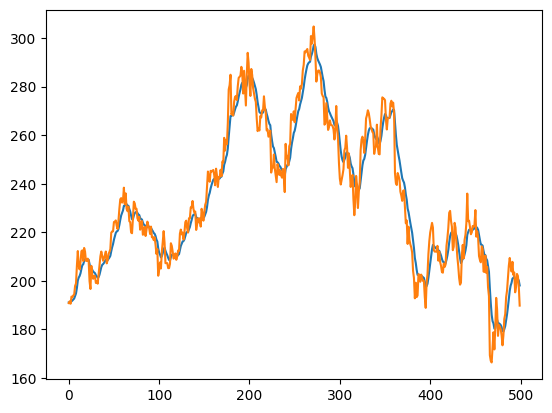

In [276]:
price = pd.read_csv("../database/stockPrice/CCC.csv")

smooth = (price["Close"].ewm(alpha=0.2).mean()).to_numpy()
x = price["Close"].to_numpy()

plt.plot(smooth[3000:3500])
plt.plot(x[3000:3500])
plt.show()

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

price = pd.read_csv("../database/stockPrice/CCC.csv")

smooth = (price["Close"].ewm(alpha=0.15).mean()).to_numpy()
x = price["Close"].to_numpy()

plt.plot(smooth[3000:3500])
plt.plot(x[3000:3500])